# CAR PRICE PREDICTION PROJECT

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

LET'S READ THE DATASETS

In [2]:
df=pd.read_csv(r'car prediction.csv')

In [3]:
df.head()

Unnamed: 0                 BRAND         VARIANT  \
0           0  2018 Maruti Alto 800             LXI   
1           1  2016 Mahindra XUV500  W10 1.99 mHawk   
2           2      2019 Maruti Ciaz      Alpha BSIV   
3           3     2021 Nissan Kicks          1.5 XV   
4           4      2019 Maruti Ciaz      Delta BSIV   

                                 PRICE      DISTANCE    FUEL How it WORK  \
0                           ₹3.15 Lakh    44,711 kms  Petrol      Manual   
1  ₹9.10 Lakh₹ 10,68,500Save ₹1,58,500  1,08,939 kms  Diesel      Manual   
2      ₹9.34 Lakh₹ 9,40,000Save ₹6,000    33,206 kms  Petrol      Manual   
3  ₹9.52 Lakh₹ 10,59,000Save ₹1,07,000     9,799 kms  Petrol      Manual   
4      ₹8.17 Lakh₹ 8,26,000Save ₹9,000    34,474 kms  Petrol      Manual   

  CUSTOMER CARE  
0     Trustmark  
1     Trustmark  
2     Trustmark  
3     Trustmark  
4     Trustmark

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3394 non-null   int64 
 1   BRAND          3394 non-null   object
 2   VARIANT        3394 non-null   object
 3   PRICE          3394 non-null   object
 4   DISTANCE       3394 non-null   object
 5   FUEL           3394 non-null   object
 6   How it WORK    3394 non-null   object
 7   CUSTOMER CARE  3394 non-null   object
dtypes: int64(1), object(7)
memory usage: 212.2+ KB


In [5]:
df.describe(include='all')

Unnamed: 0               BRAND VARIANT       PRICE    DISTANCE  \
count   3394.000000                3394    3394        3394        3394   
unique          NaN                 912    1229        1011        1041   
top             NaN  2018 Hyundai Creta     VXI  ₹5.50 Lakh  65,000 kms   
freq            NaN                  34      77          38          81   
mean    1696.500000                 NaN     NaN         NaN         NaN   
std      979.907734                 NaN     NaN         NaN         NaN   
min        0.000000                 NaN     NaN         NaN         NaN   
25%      848.250000                 NaN     NaN         NaN         NaN   
50%     1696.500000                 NaN     NaN         NaN         NaN   
75%     2544.750000                 NaN     NaN         NaN         NaN   
max     3393.000000                 NaN     NaN         NaN         NaN   

          FUEL How it WORK CUSTOMER CARE  
count     3394        3394          3394  
unique       5           2             3  
top     Petrol      Manual       Partner  
freq      1815        2135          3096  
mean       NaN         NaN           NaN  
std        NaN         NaN           NaN  
min        NaN         NaN           NaN  
25%        NaN         NaN           NaN  
50%        NaN         NaN           NaN  
75%        NaN         NaN           NaN  
max        NaN         NaN           NaN

In [6]:
df.dtypes

Unnamed: 0        int64
BRAND            object
VARIANT          object
PRICE            object
DISTANCE         object
FUEL             object
How it WORK      object
CUSTOMER CARE    object
dtype: object

In [7]:
type(df)

pandas.core.frame.DataFrame

EXPLORATORY DATA ANALYSIS

In [8]:
df.isnull().sum()

Unnamed: 0       0
BRAND            0
VARIANT          0
PRICE            0
DISTANCE         0
FUEL             0
How it WORK      0
CUSTOMER CARE    0
dtype: int64

In [9]:
corr=df.corr()
corr

Unnamed: 0
Unnamed: 0         1.0

In [10]:
corr.shape

(1, 1)

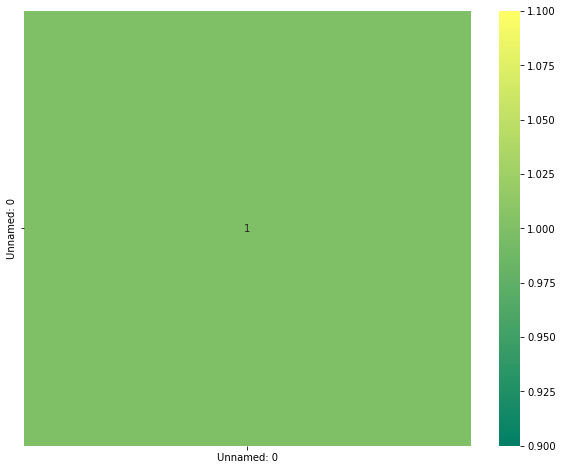

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='summer')
plt.show()

<AxesSubplot:title={'center':'BRAND'}>

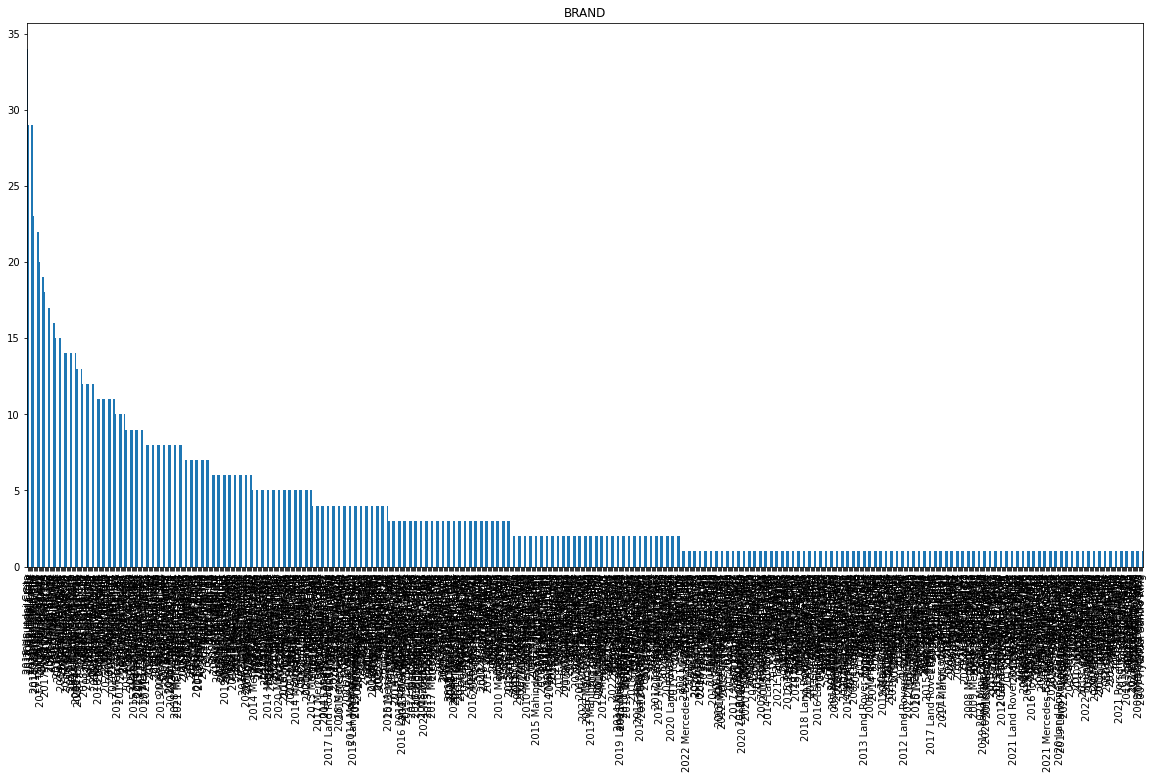

In [12]:
plt.subplot()
df['BRAND'].value_counts().plot(kind='bar',title='BRAND',figsize=(20,10))

<AxesSubplot:title={'center':'VARIANT'}>

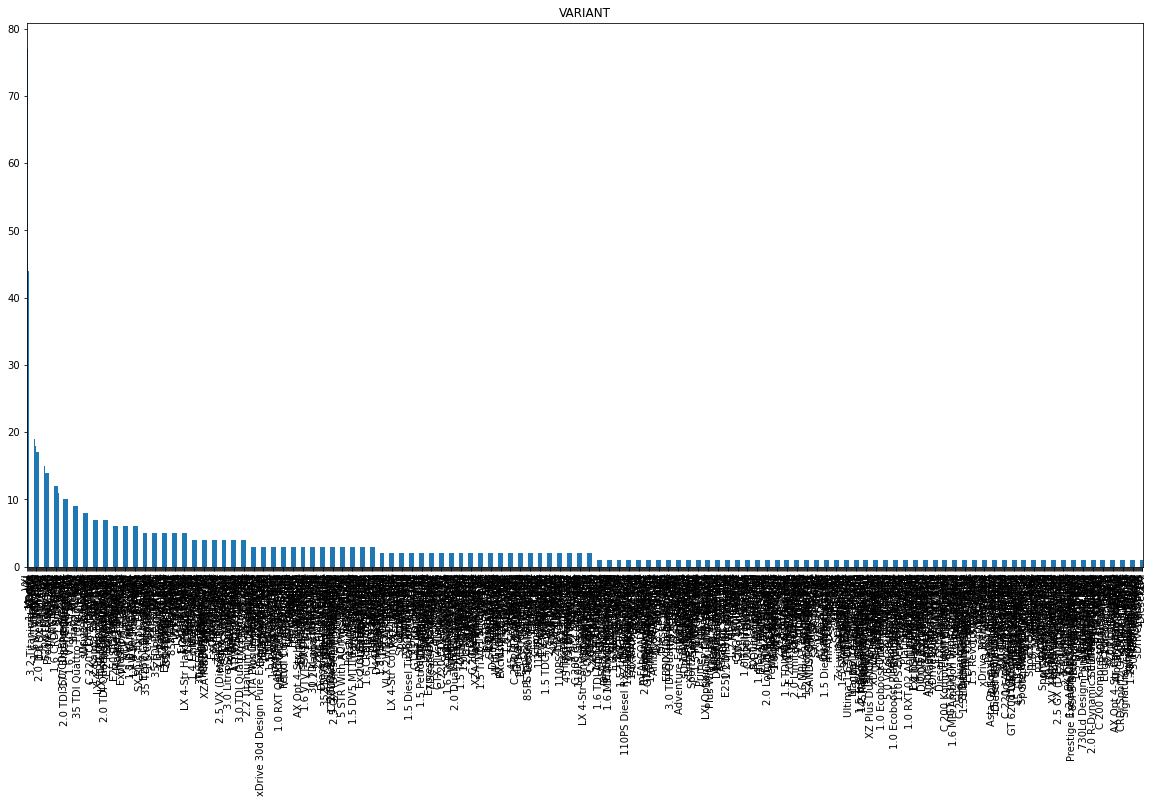

In [13]:
plt.subplot()
df['VARIANT'].value_counts().plot(kind='bar',title='VARIANT',figsize=(20,10))

<AxesSubplot:title={'center':'PRICE'}>

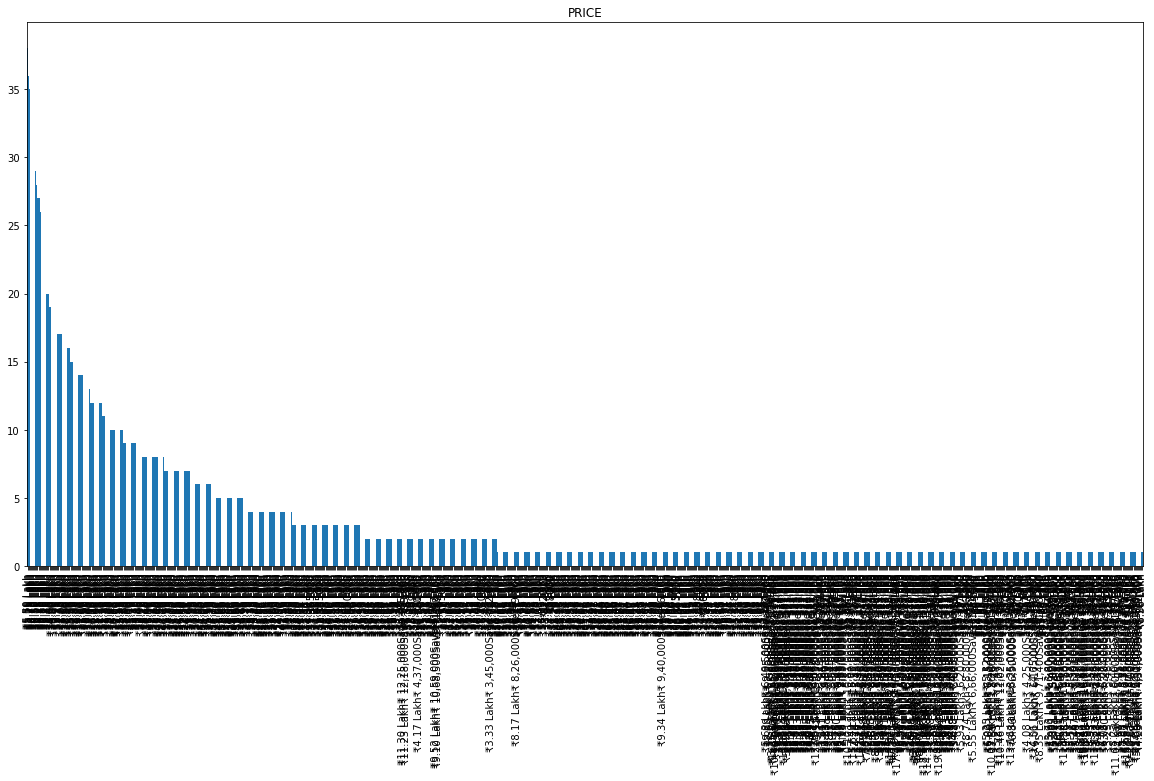

In [14]:
plt.subplot()
df['PRICE'].value_counts().plot(kind='bar',title='PRICE',figsize=(20,10))

<AxesSubplot:title={'center':'DISTANCE'}>

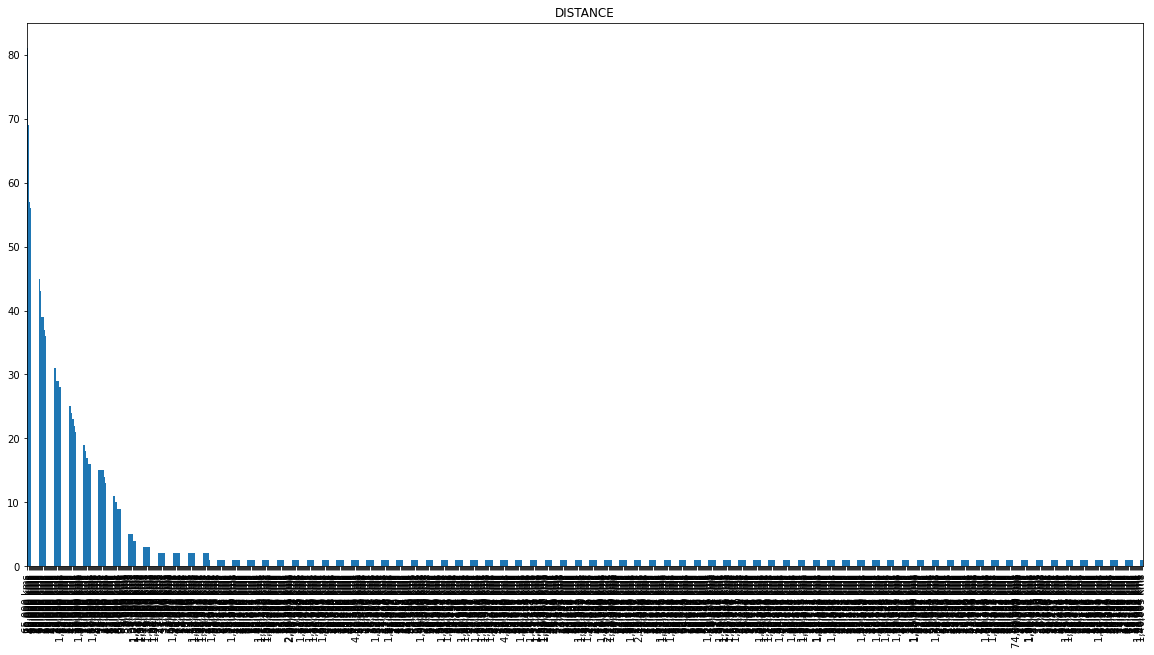

In [15]:
plt.subplot()
df['DISTANCE'].value_counts().plot(kind='bar',title='DISTANCE',figsize=(20,10))

<AxesSubplot:title={'center':'FUEL'}>

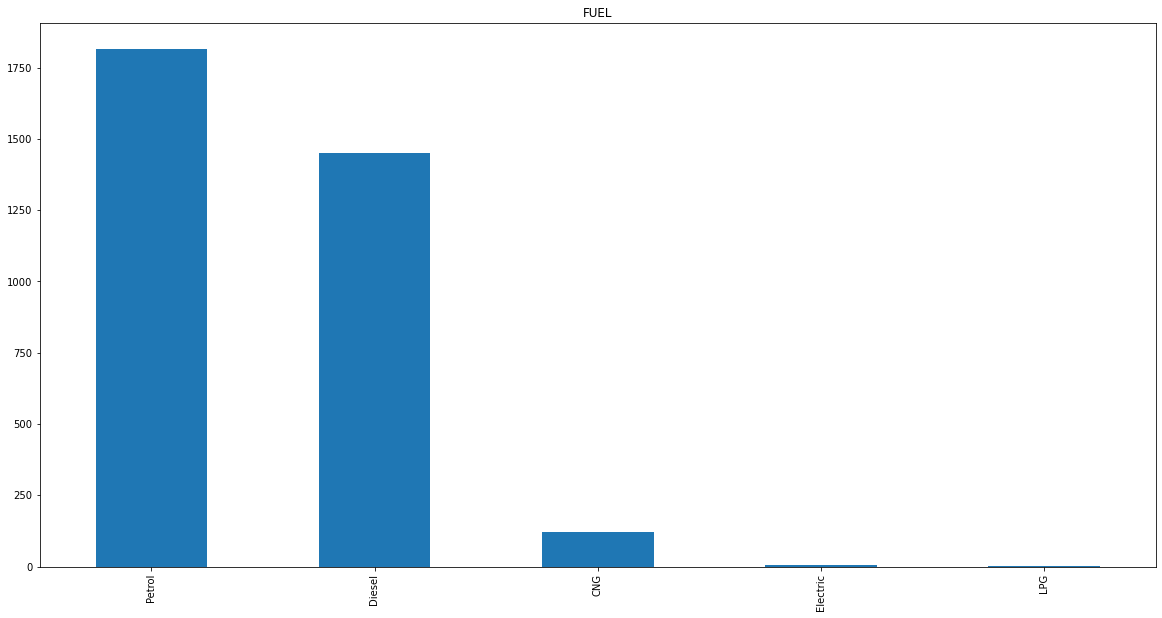

In [16]:
plt.subplot()
df['FUEL'].value_counts().plot(kind='bar',title='FUEL',figsize=(20,10))

<AxesSubplot:title={'center':'HOW IT WORK'}>

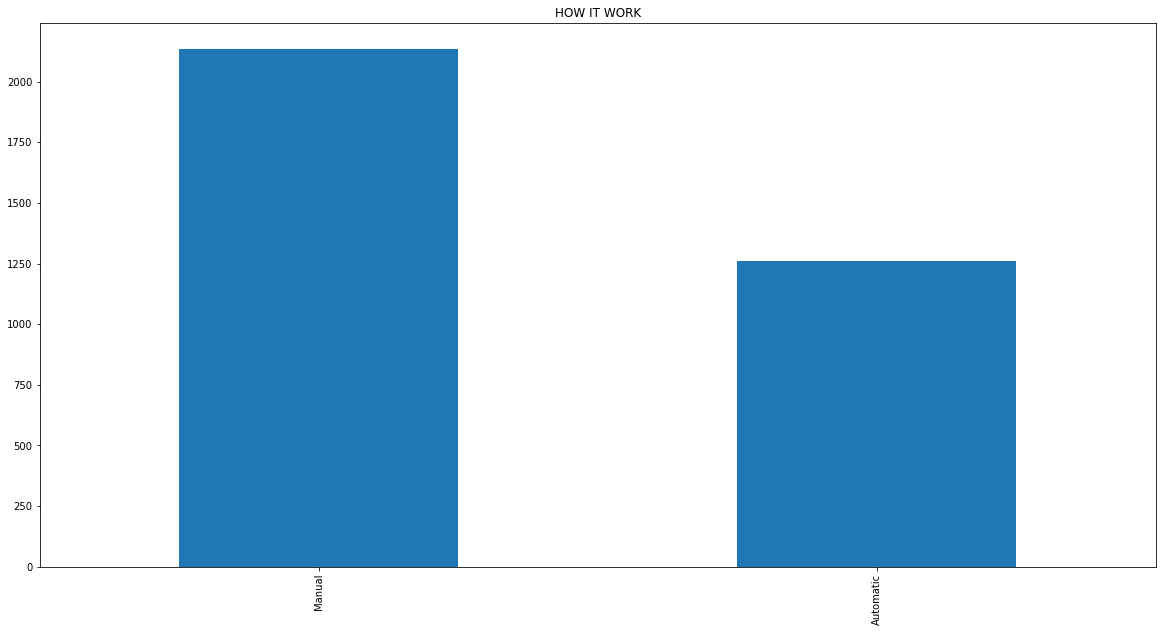

In [17]:
plt.subplot()
df['How it WORK'].value_counts().plot(kind='bar',title='HOW IT WORK',figsize=(20,10))

<AxesSubplot:title={'center':'CUSTOMER CARE'}>

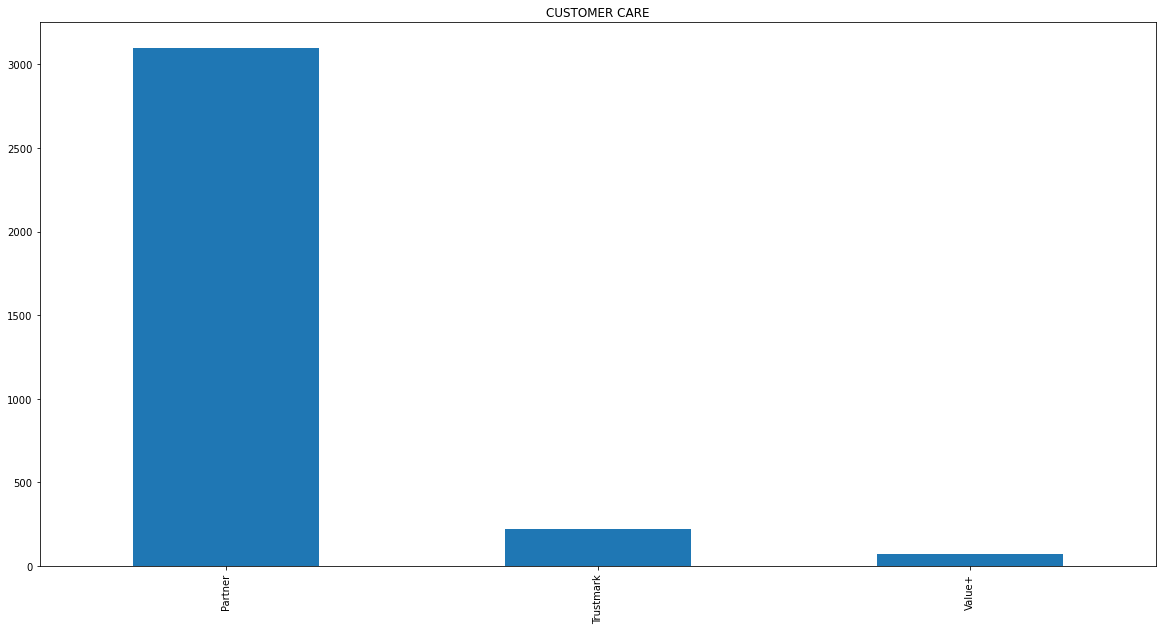

In [18]:
plt.subplot()
df['CUSTOMER CARE'].value_counts().plot(kind='bar',title='CUSTOMER CARE',figsize=(20,10))

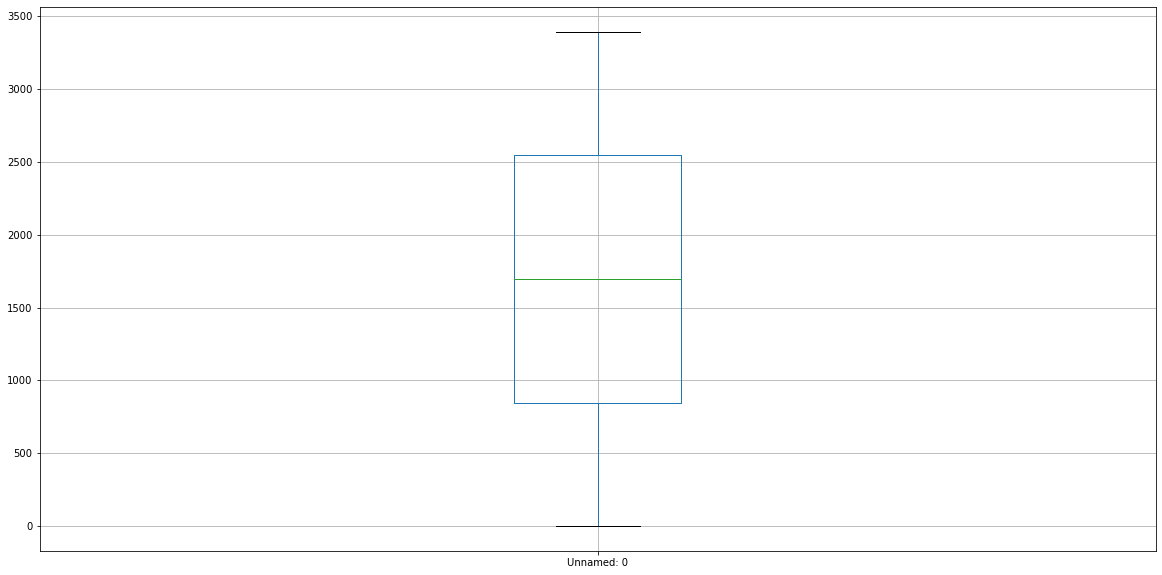

In [19]:
plt.figure(figsize=(20,10))
df.boxplot();

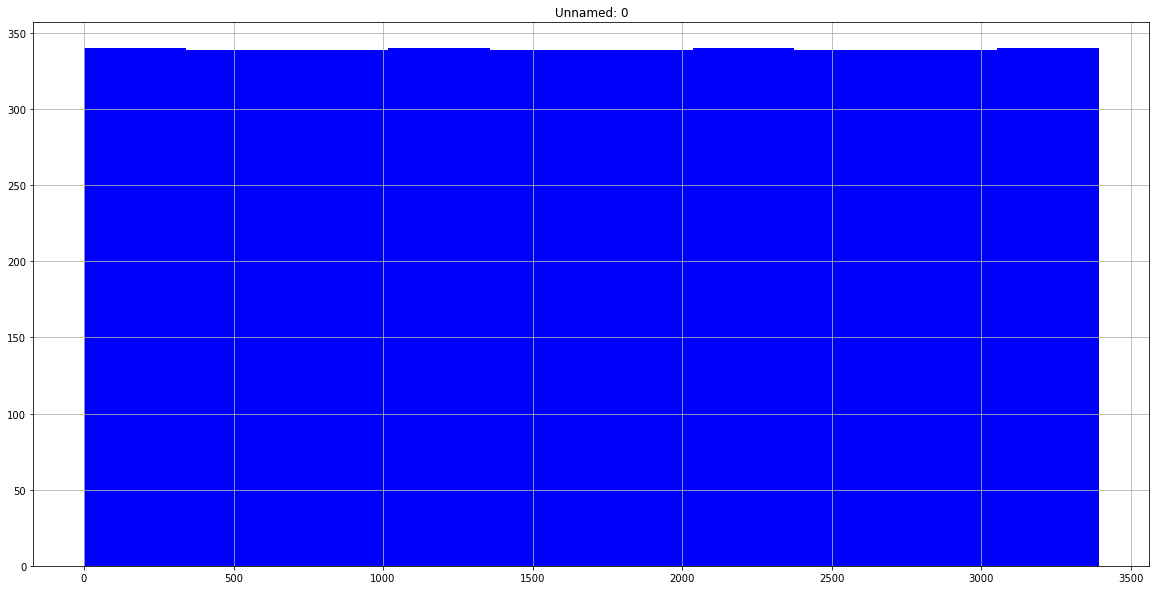

In [20]:
df.hist(color='b',figsize=(20,10))
plt.show()

Empty DataFrame
Columns: []
Index: []


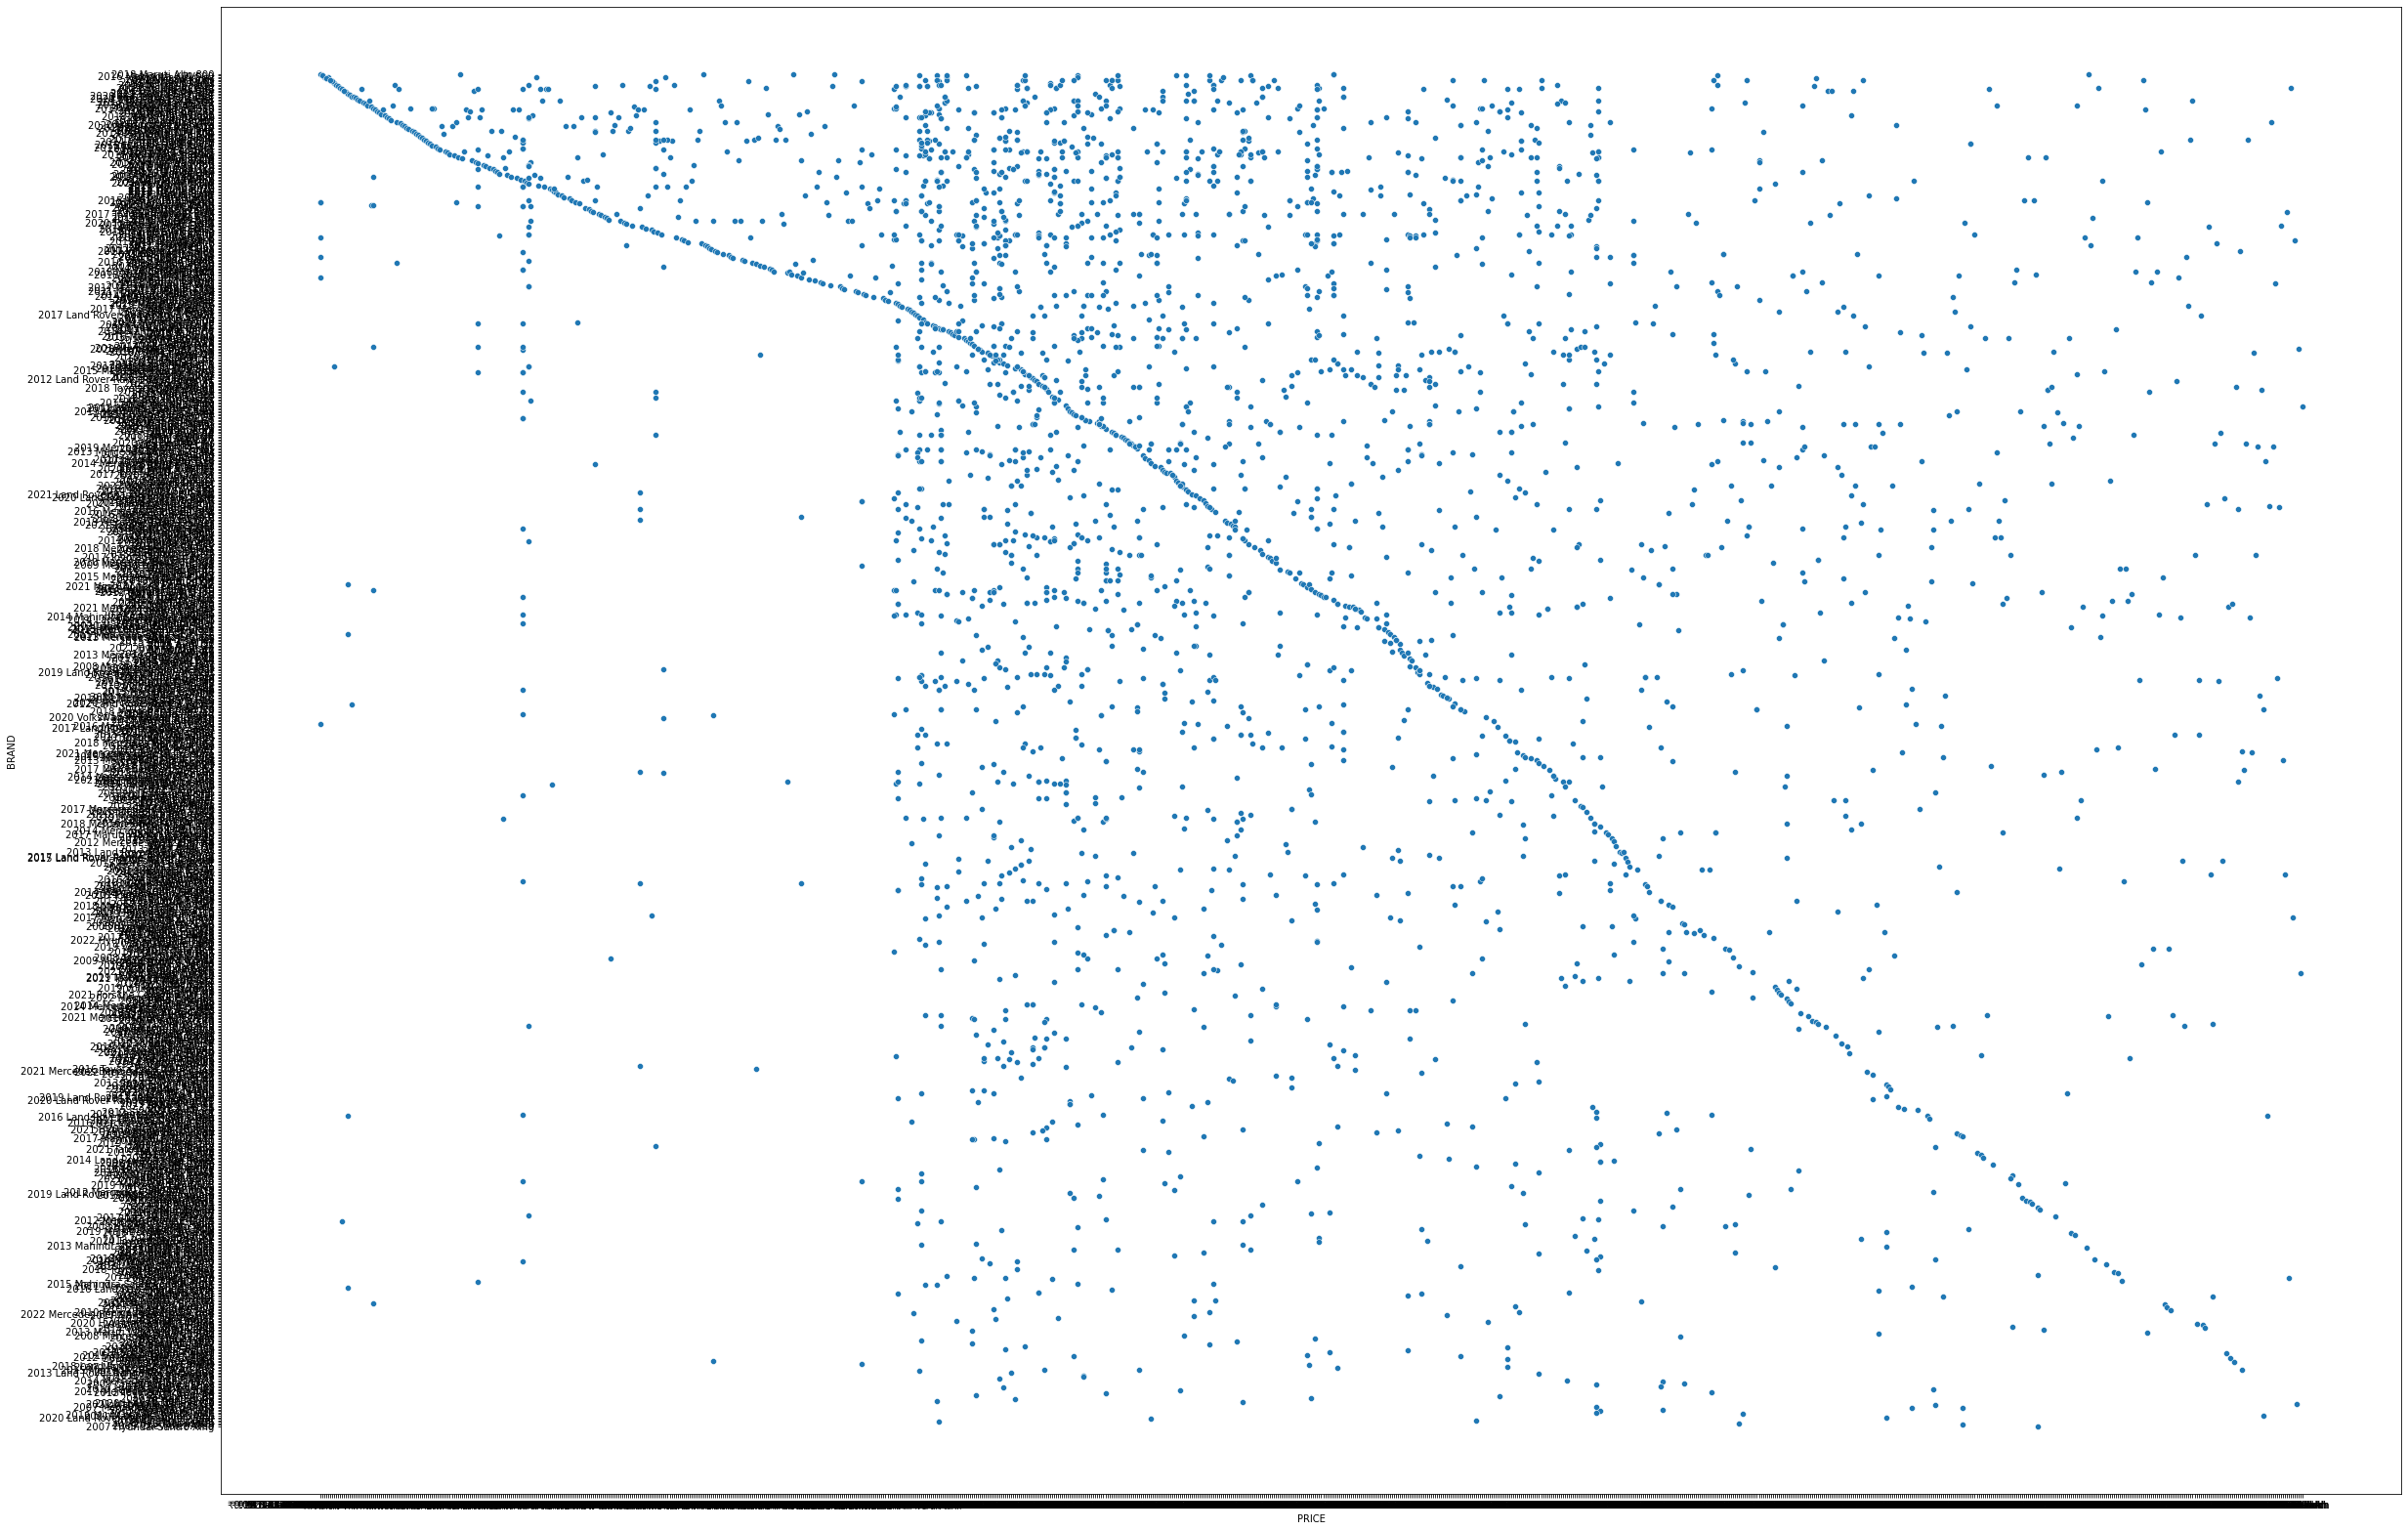

In [21]:
plt.figure(figsize=(40,28))
sns.scatterplot(df['PRICE'],df['BRAND'])
print(df[['PRICE','BRAND']].corr())
plt.show()

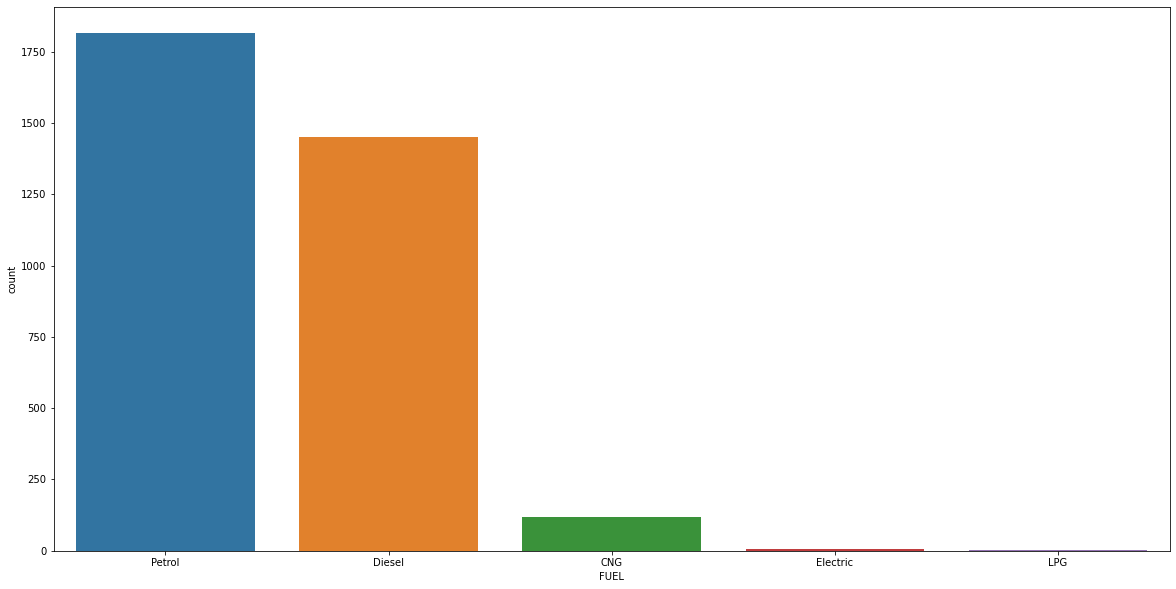

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(df['FUEL'])
plt.show()

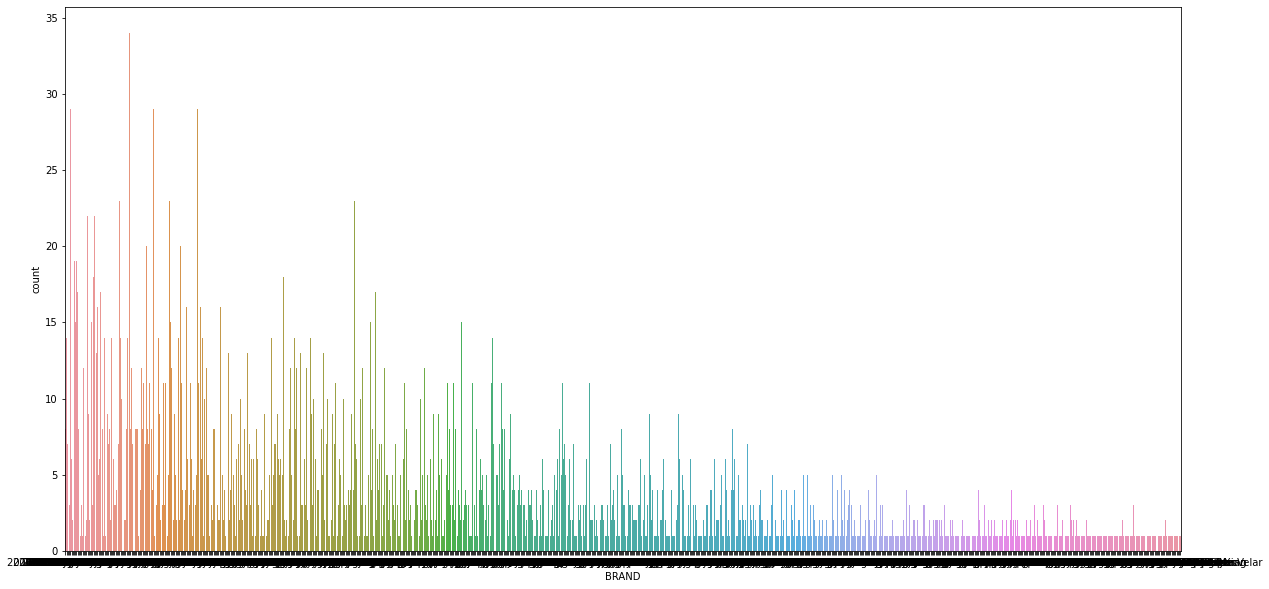

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(df['BRAND'])
plt.show()

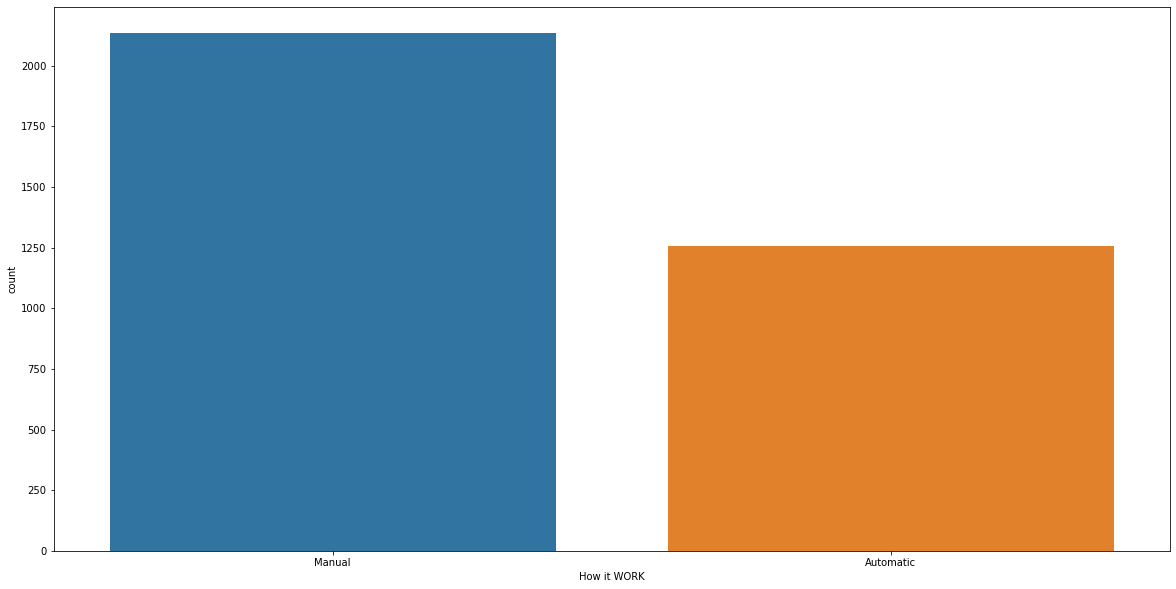

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(df['How it WORK'])
plt.show()

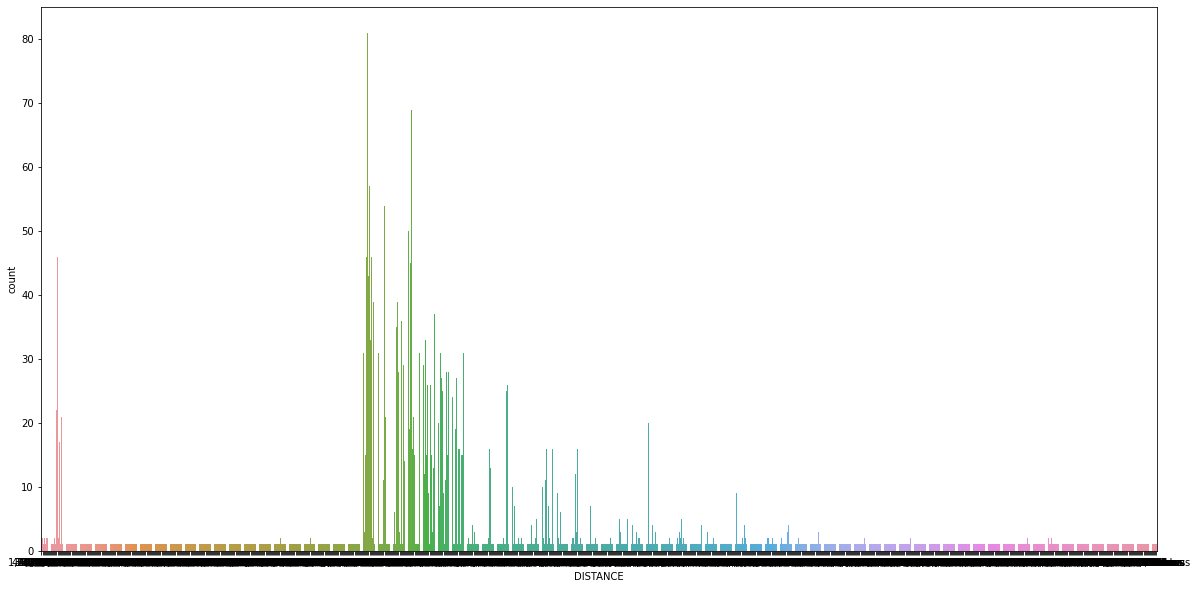

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(df['DISTANCE'])
plt.show()

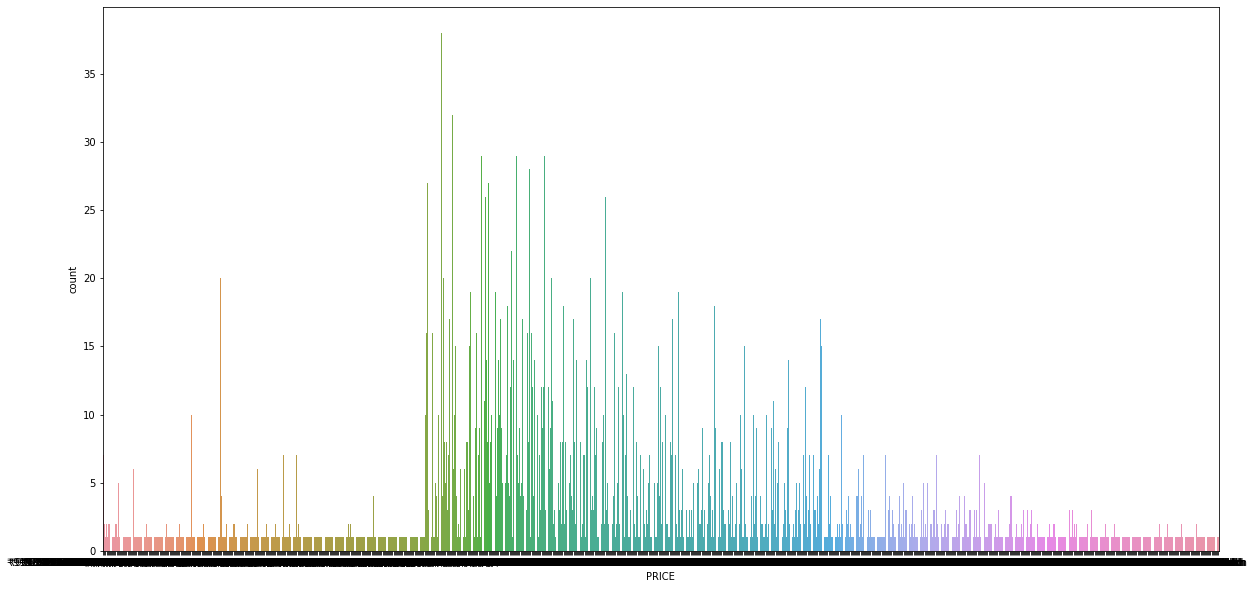

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(df['PRICE'])
plt.show()

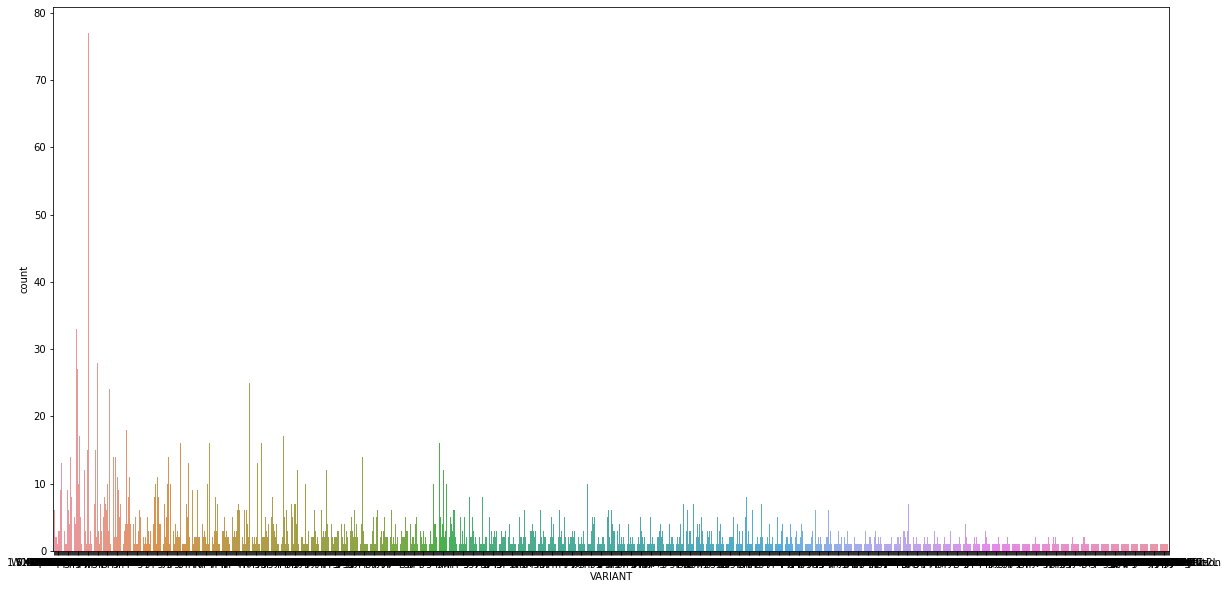

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(df['VARIANT'])
plt.show()

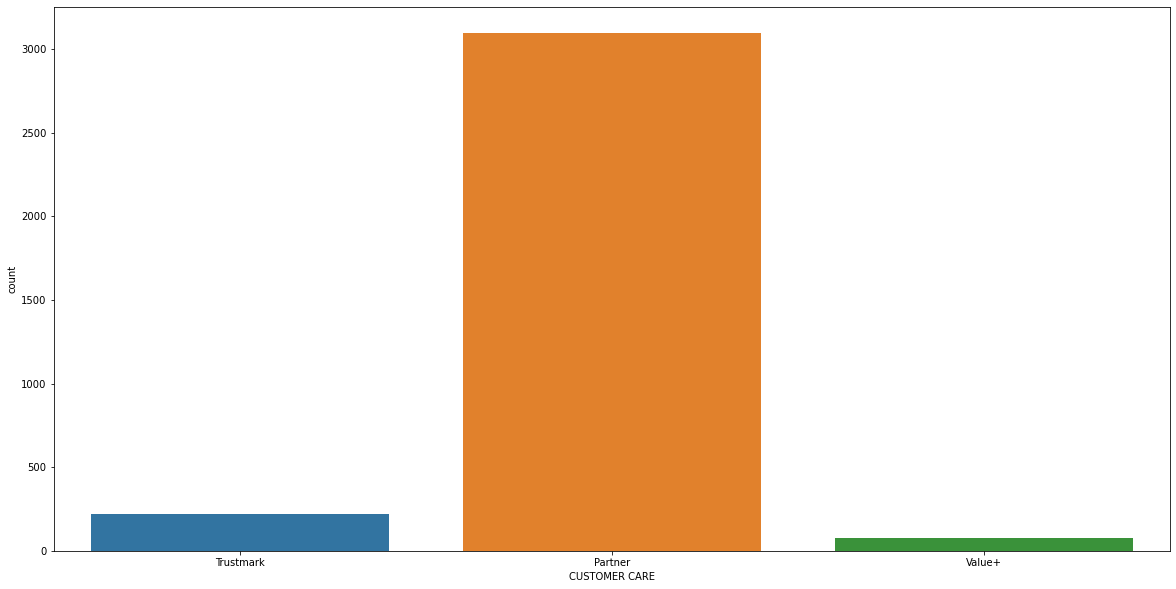

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(df['CUSTOMER CARE'])
plt.show()

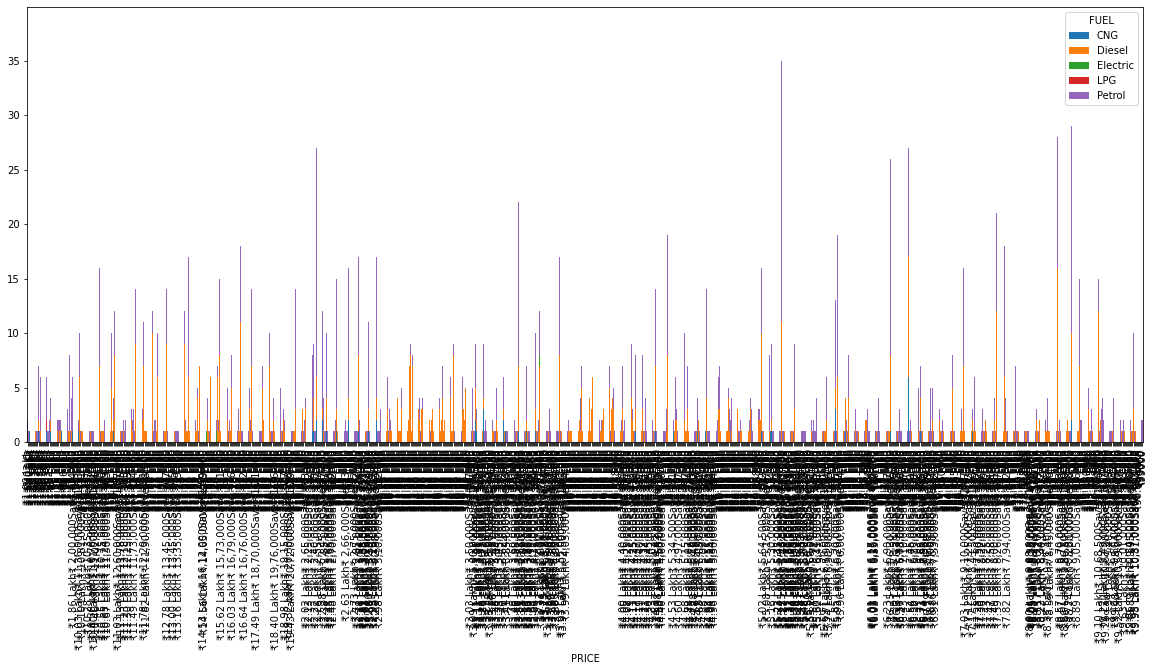

In [29]:
data=pd.crosstab(df['PRICE'],df['FUEL'])
data.plot.bar(stacked=True,figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='FUEL', ylabel='PRICE'>

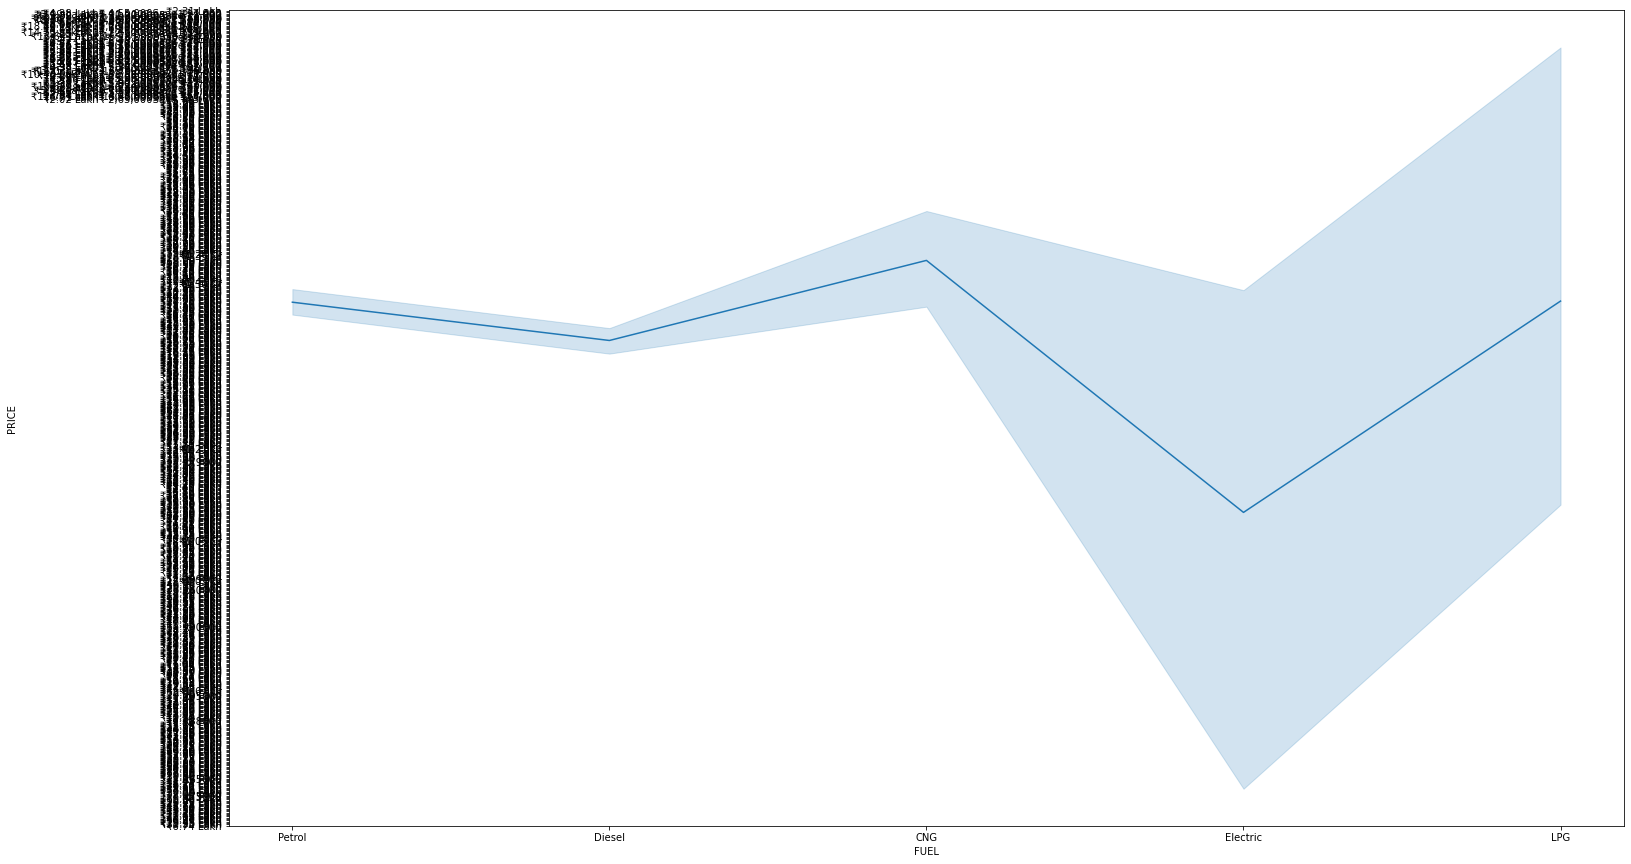

In [30]:
plt.figure(figsize=(25,15))
sns.lineplot(x='FUEL',y='PRICE',data=df)

<AxesSubplot:xlabel='DISTANCE', ylabel='PRICE'>

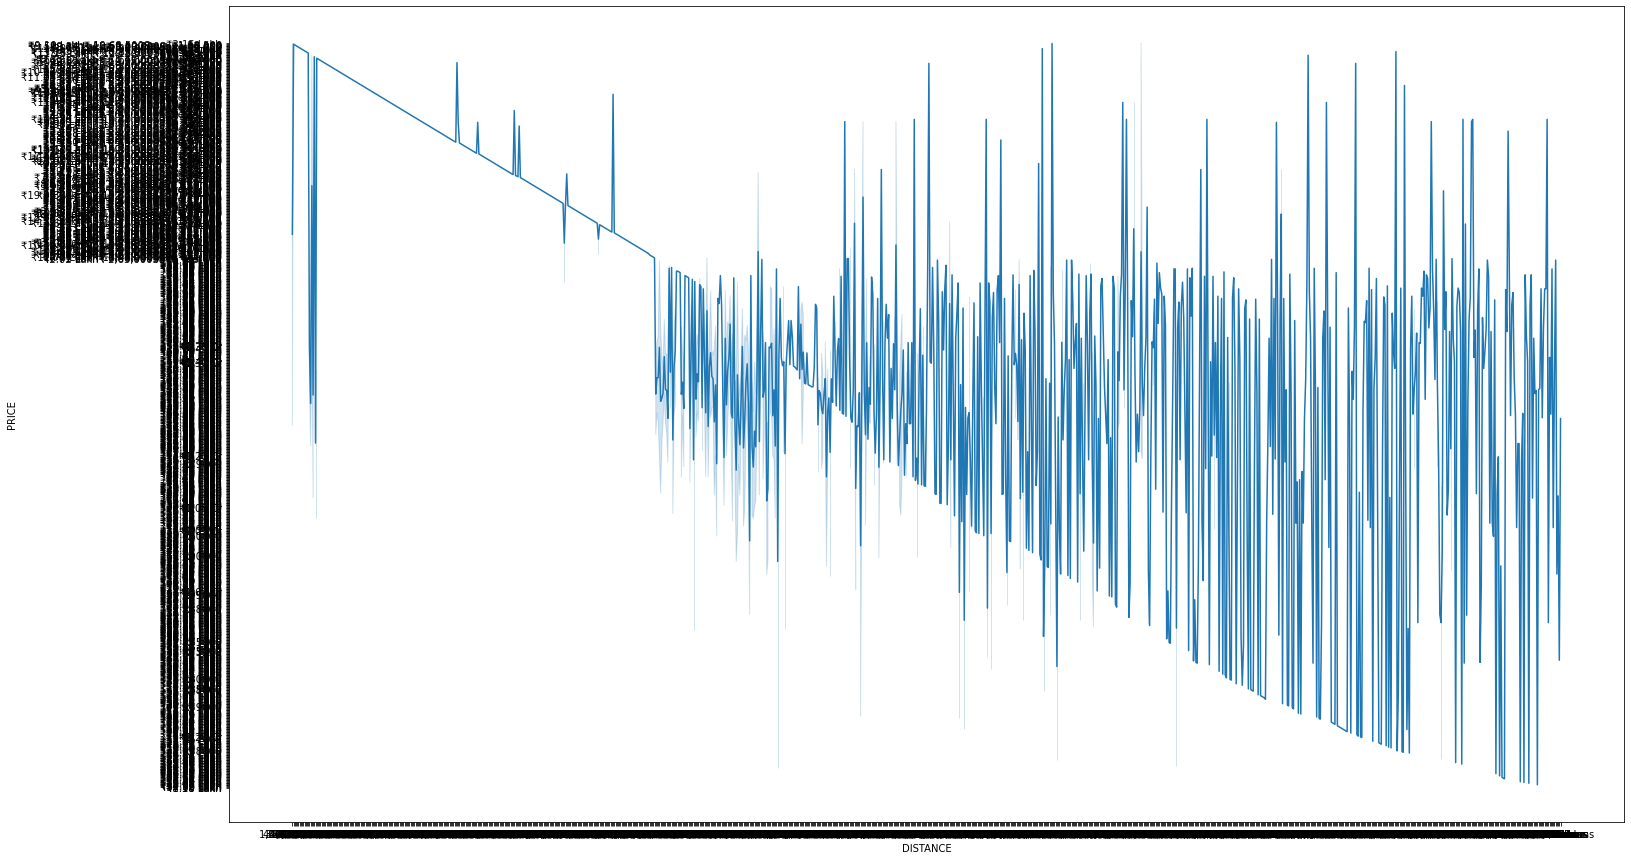

In [31]:
plt.figure(figsize=(25,15))
sns.lineplot(x='DISTANCE',y='PRICE',data=df)

<AxesSubplot:xlabel='CUSTOMER CARE', ylabel='PRICE'>

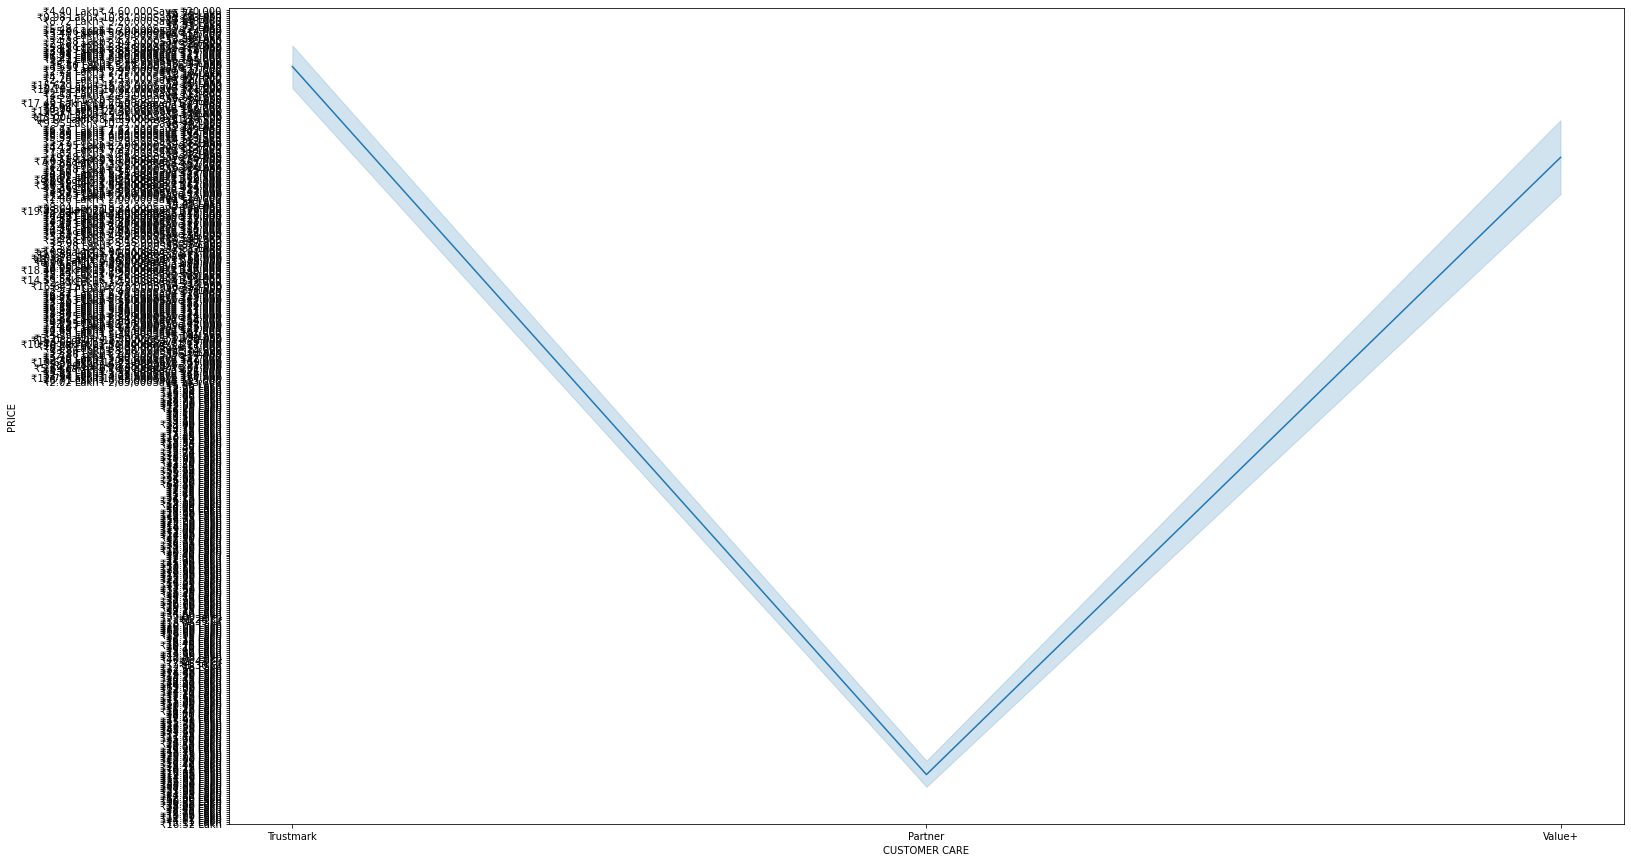

In [32]:
plt.figure(figsize=(25,15))
sns.lineplot(x='CUSTOMER CARE',y='PRICE',data=df)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:yl

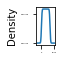

In [33]:
df.plot(kind='density',subplots=True,layout=(5,15),legend=False,fontsize=2)

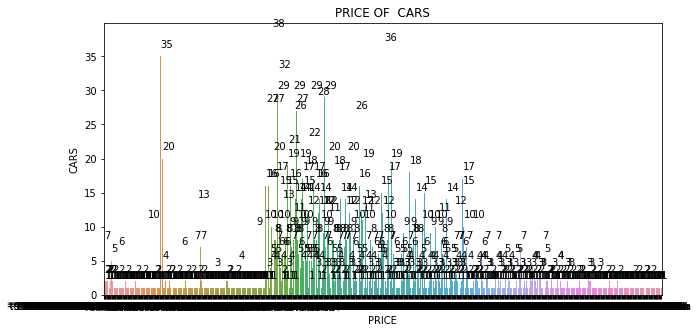

In [34]:
plt.figure(figsize=(10,5))
plt.title('PRICE OF  CARS')
ax=sns.countplot(x='PRICE',data=df)
plt.xlabel('PRICE')
plt.ylabel('CARS')
for i  in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x()+0.25, i.get_height()+1), va='bottom',color='black')

<Figure size 1080x720 with 0 Axes>

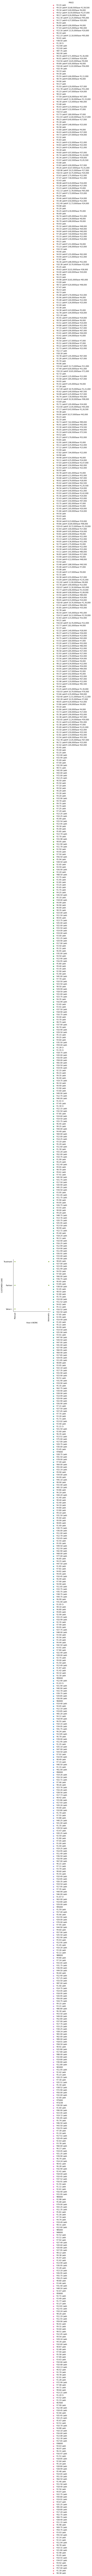

In [35]:
plt.figure(figsize=(15,10))
sns.relplot(x='How it WORK', y='CUSTOMER CARE', hue='PRICE',data=df)
plt.xticks(rotation=90);

<AxesSubplot:>

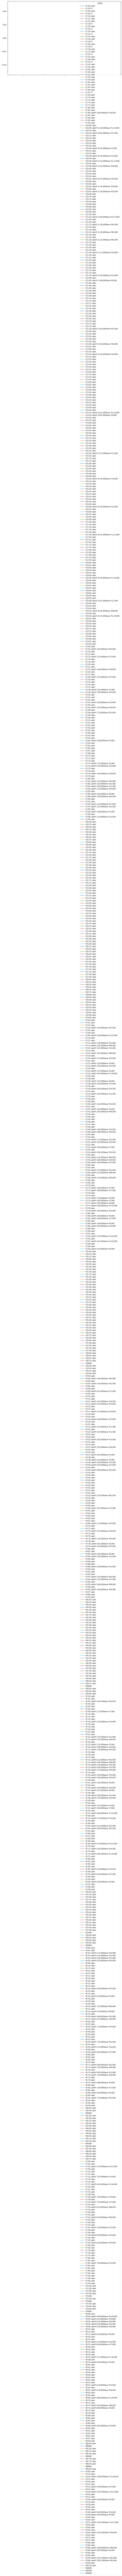

In [36]:
df.groupby('PRICE')[['BRAND' , 'FUEL' , 'How it WORK']].mean().T.plot(figsize=(12,8))

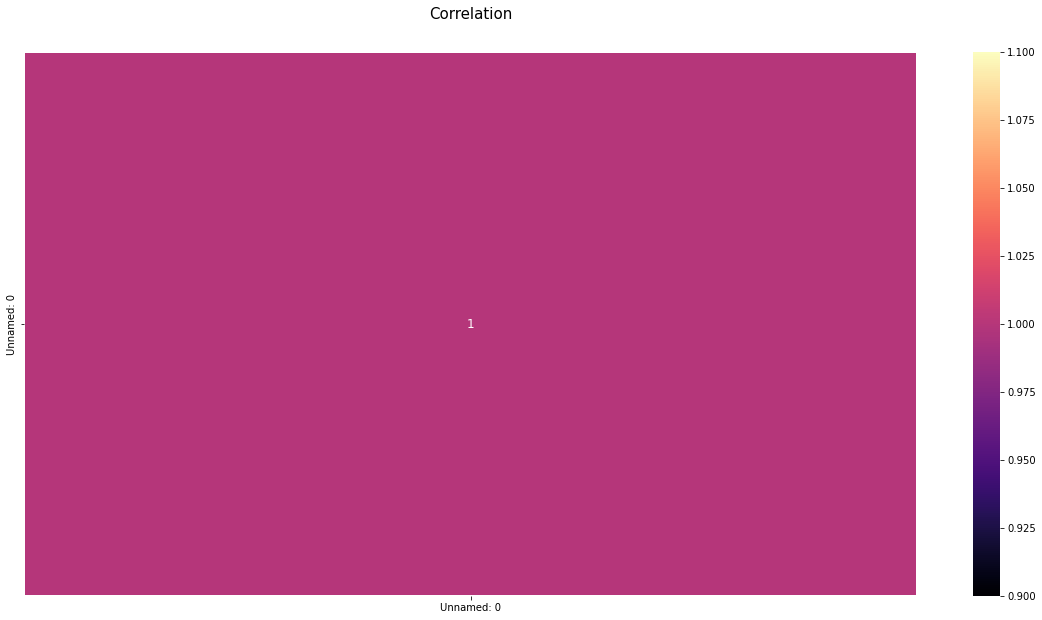

In [37]:
def correlation_heatmap(df):
    ax=plt.subplots(figsize=(20,10))
    colormap=sns.diverging_palette(220, 10, as_cmap = True)
    ax=sns.heatmap(df.corr(),cmap="magma",annot=True,linewidths=0.1,vmax=1.0,linecolor='white',annot_kws={'fontsize':12})
    plt.title('Correlation',y=1.05,size=15)

correlation_heatmap(df)

In [38]:
# categorical value
c=(df.dtypes=="object")
object_cols=list(c[c].index)
print("categorical values: ")
print(object_cols)

categorical values: 
['BRAND', 'VARIANT', 'PRICE', 'DISTANCE', 'FUEL', 'How it WORK', 'CUSTOMER CARE']


In [39]:
for i in object_cols:
    print(i, df[i].isnull().sum())

BRAND 0
VARIANT 0
PRICE 0
DISTANCE 0
FUEL 0
How it WORK 0
CUSTOMER CARE 0


In [40]:
for i in object_cols:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [41]:
#numerical value
n=(df.dtypes == "float64")
num_cols=list(n[n].index)
print("Numeric values: ")
print(num_cols)

Numeric values: 
[]


In [42]:
for i in num_cols:
    print(i, df[i].isnull().sum())

In [43]:
for i in num_cols:
    df[i].fillna(df[i].median(),inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3394 non-null   int64 
 1   BRAND          3394 non-null   object
 2   VARIANT        3394 non-null   object
 3   PRICE          3394 non-null   object
 4   DISTANCE       3394 non-null   object
 5   FUEL           3394 non-null   object
 6   How it WORK    3394 non-null   object
 7   CUSTOMER CARE  3394 non-null   object
dtypes: int64(1), object(7)
memory usage: 212.2+ KB


In [45]:
# label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in object_cols:
    df[i] = label_encoder.fit_transform(df[i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     3394 non-null   int64
 1   BRAND          3394 non-null   int32
 2   VARIANT        3394 non-null   int32
 3   PRICE          3394 non-null   int32
 4   DISTANCE       3394 non-null   int32
 5   FUEL           3394 non-null   int32
 6   How it WORK    3394 non-null   int32
 7   CUSTOMER CARE  3394 non-null   int32
dtypes: int32(7), int64(1)
memory usage: 119.4 KB


DATA PREPROCESSING

In [46]:
from sklearn import preprocessing
features=df.drop(['DISTANCE','PRICE','VARIANT'],axis=1)
target=df['PRICE']
col_names=list(features.columns)
scaler=preprocessing.StandardScaler()
features=scaler.fit_transform(features)
features=pd.DataFrame(features,columns=col_names)
features.describe().T

count          mean       std       min       25%       50%  \
Unnamed: 0     3394.0  2.100068e-17  1.000147 -1.731541 -0.865770  0.000000   
BRAND          3394.0 -2.119695e-17  1.000147 -2.010985 -0.802179  0.095912   
FUEL           3394.0 -9.350865e-16  1.000147 -1.667393 -1.019302  0.924972   
How it WORK    3394.0  1.107606e-16  1.000147 -1.302225 -1.302225  0.767916   
CUSTOMER CARE  3394.0 -4.550770e-15  1.000147 -0.291626 -0.291626 -0.291626   

                    75%       max  
Unnamed: 0     0.865770  1.731541  
BRAND          0.806724  1.866557  
FUEL           0.924972  0.924972  
How it WORK    0.767916  0.767916  
CUSTOMER CARE -0.291626  5.015496

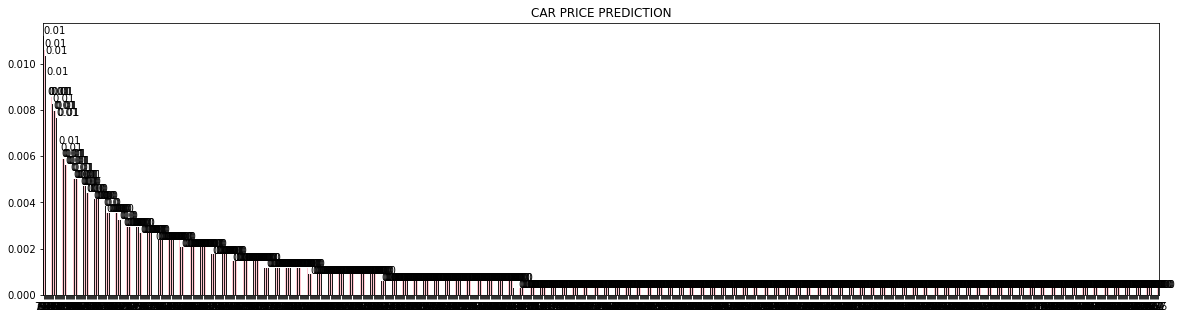

In [47]:
plt.figure(figsize=(20,5))
ax=df.PRICE.value_counts(normalize=True).plot(kind='bar', color=['black', 'pink'], alpha=0.9, rot=0)
plt.title('CAR PRICE PREDICTION')
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x() * 1.01, i.get_height() * 1.01))
    
plt.show()  

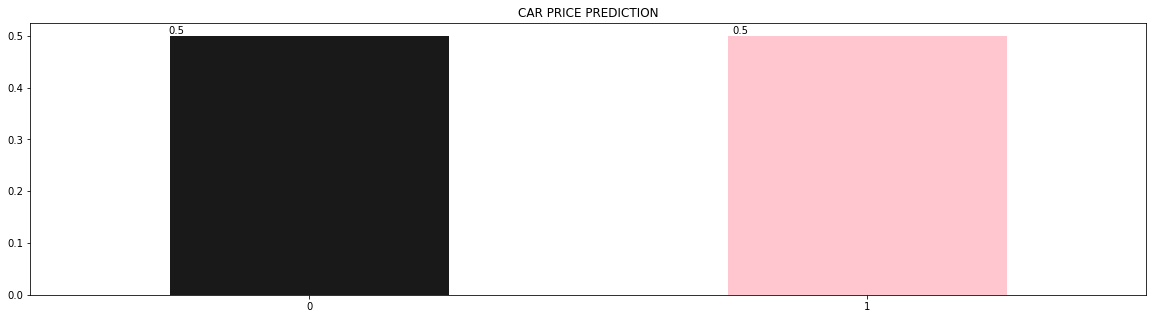

In [48]:
from sklearn.utils import resample

Car_price=df[df.PRICE == 0]
Prediction_price=df[df.PRICE == 1]
Prediction_price_oversampled=resample(Prediction_price, replace=True, n_samples=len(Car_price), random_state=42)
oversampled = pd.concat([Car_price, Prediction_price_oversampled])

plt.figure(figsize=(20,5))

ax=oversampled.PRICE.value_counts(normalize=True).plot(kind='bar', color=['black', 'pink'], alpha=0.9, rot=0)
plt.title('CAR PRICE PREDICTION')
for i in ax.patches:
    ax.annotate(str(round(i.get_height(),2)),(i.get_x() * 1.01, i.get_height() * 1.01))
    
plt.show()   

<AxesSubplot:>

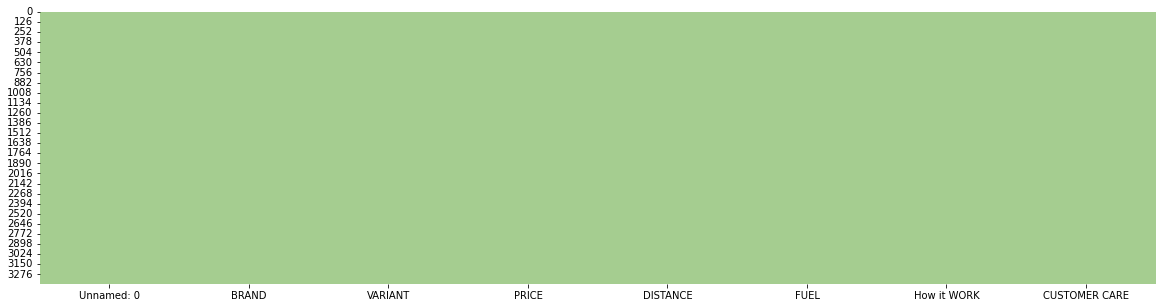

In [49]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),cbar=False,cmap='crest')

DATA CLEANING

In [50]:
total=oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total' , 'Percent'])
missing.head()

Total  Percent
Unnamed: 0      0      0.0
BRAND           0      0.0
VARIANT         0      0.0
PRICE           0      0.0
DISTANCE        0      0.0

In [51]:
oversampled.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [52]:
oversampled['DISTANCE'] = oversampled['DISTANCE'].fillna(oversampled['DISTANCE'].mode()[0])
oversampled['BRAND'] = oversampled['BRAND'].fillna(oversampled['BRAND'].mode()[0])
oversampled['FUEL'] = oversampled['FUEL'].fillna(oversampled['FUEL'].mode()[0])
oversampled['How it WORK'] = oversampled['How it WORK'].fillna(oversampled['How it WORK'].mode()[0])

convert categorical features to continous features

In [53]:
from sklearn.preprocessing import LabelEncoder
LE={}
for col in df.select_dtypes(include=['object']).columns: 
    LE[col] = LabelEncoder()
    df[col]=LE[col].fit_transform(oversampled[col])

In [54]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed=df.copy(deep=True)
mice_imputer=IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(df)

BULIDING MODELS

In [55]:
from sklearn.model_selection import train_test_split
X=features.drop(["BRAND"],axis=1)
y=features["BRAND"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X.shape

(3394, 4)

In [56]:
 from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('PRICE', axis=1)
y=MiceImputed['PRICE']
selector = SelectFromModel(rf(n_estimators=100,random_state=0))
selector.fit(X,y)
support=selector.get_support()
features=X.loc[:, support].columns.tolist()
print(features)
print(rf(n_estimators=100,random_state=0).fit(X,y).feature_importances_)

['Unnamed: 0', 'BRAND', 'VARIANT', 'DISTANCE']
[0.25867595 0.22751297 0.23252528 0.23814702 0.02841148 0.00651789
 0.00820941]


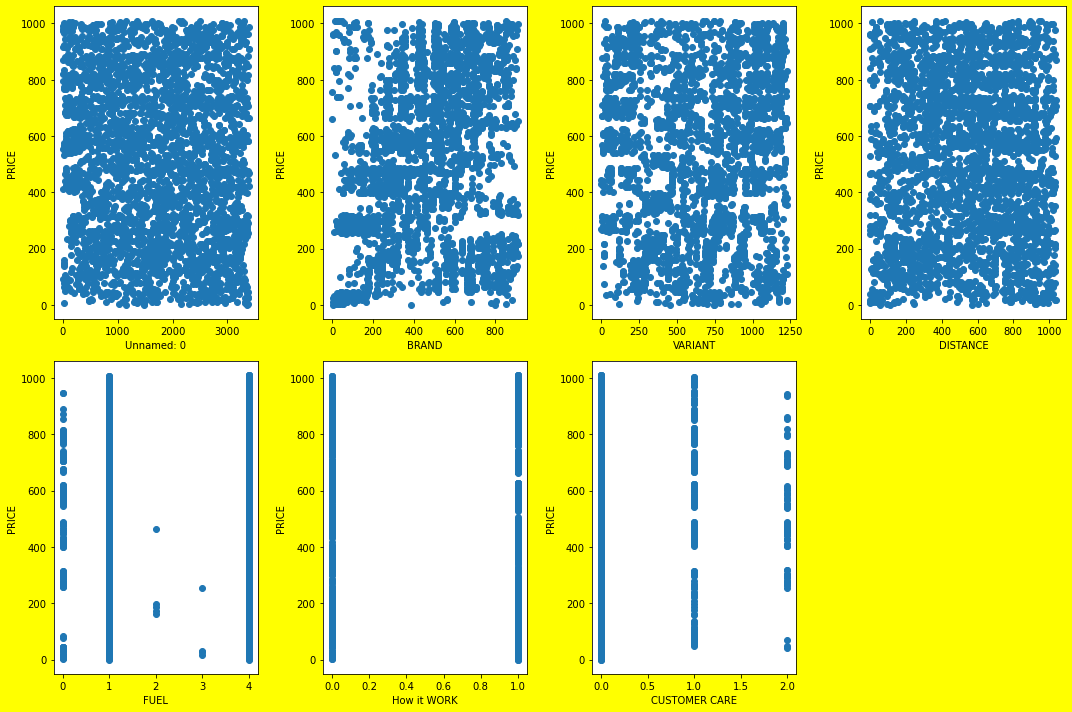

In [57]:
# Visualizing relationship
plt.figure(figsize=(15,10), facecolor= 'yellow')
plotnumber  =  1

for column in X:
    if plotnumber<=8  :
        aX  =  plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('PRICE',fontsize=10)
    plotnumber+=1
plt.tight_layout()    

In [58]:
from sklearn.preprocessing import StandardScaler
# Data Scaling Formula Z=(x-mean)/std
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.73154056,  0.55559882,  0.28924445, ...,  0.92497169,
         0.76791637,  2.36193515],
       [-1.7305199 , -0.13818739,  1.2339643 , ..., -1.019302  ,
         0.76791637,  2.36193515],
       [-1.72949925,  0.93441461, -0.37514309, ...,  0.92497169,
         0.76791637,  2.36193515],
       ...,
       [ 1.72949925,  0.25765383, -0.27142014, ..., -1.66739323,
         0.76791637, -0.29162589],
       [ 1.7305199 ,  0.66200775, -1.76839462, ...,  0.92497169,
         0.76791637, -0.29162589],
       [ 1.73154056,  0.48324075, -1.49366897, ..., -1.019302  ,
         0.76791637, -0.29162589]])

In [59]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [60]:
# Adjusted R2 score
regression.score(X_train,y_train)

0.04557368067413348

In [61]:
regression.score(X_test,y_test)

0.04112955828497522

In [62]:
y_pred = regression.predict(X_test)
y_pred

array([-0.116284  ,  0.24527951,  0.12412139,  0.30779489, -0.07189874,
        0.30907362,  0.30016027,  0.40699594, -0.19321653, -0.25092508,
       -0.11521062,  0.03659987,  0.00152487,  0.23538293,  0.24428369,
       -0.26137489, -0.01131339,  0.09944718, -0.02270999, -0.07030233,
        0.22215435, -0.1094239 , -0.10989958,  0.40057843, -0.19704014,
        0.03327723, -0.11705853, -0.16024382,  0.30706772, -0.25413383,
        0.04521114, -0.04085605, -0.34486411,  0.07570226,  0.31892118,
        0.18182994, -0.39091367,  0.12544915, -0.10160108, -0.31111687,
       -0.06238313,  0.0610969 , -0.37628777, -0.08533602, -0.15123242,
        0.24461563,  0.07359998,  0.02031563, -0.11053037, -0.01286244,
       -0.05623594, -0.0784269 , -0.24466724, -0.35792042, -0.01640313,
        0.23007189,  0.06669576, -0.1357909 , -0.13529929, -0.11930455,
        0.03892021, -0.11716917, -0.28223809, -0.08019725,  0.03117818,
        0.27161342,  0.05386075,  0.06098626, -0.2360368 ,  0.07

BIVARIATE ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

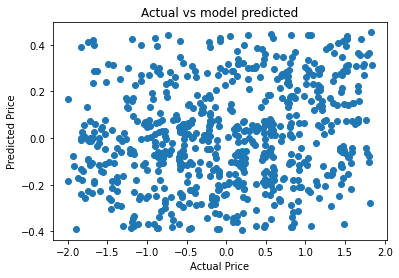

In [63]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs model predicted')
plt.show

MODEL EVALUATION

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred=regression.predict(X_test)

In [65]:
mean_absolute_error(y_test,y_pred)

0.810667038656278

In [66]:
mean_squared_error(y_test,y_pred)

0.9196428915427611

In [67]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.958980130942639

In [68]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV
# LassoCV will return bestalpha after max iteration
#Normalize is subtracting the mean and dividing by the L2-norm

lassoregularization=Lasso()
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}

lasscv=GridSearchCV(lassoregularization,parameters,scoring='neg_mean_squared_error', n_jobs=-1,cv=5)


lasscv  =  LassoCV(alphas  =  None, max_iter  =  100, normalize  =  True)
lasscv.fit(X_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [69]:
#best alpha parameter
alpha  =  lasscv.alpha_
alpha

0.00011656001118232149

In [70]:
#now that we have best parameter, Let's use Lasso regression and see how well our data has fitted before

lasso_reg  =  Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.00011656001118232149)

In [71]:
lasso_reg.score(X_test,y_test)

0.04111732813747415

In [72]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.

ridge_regressor=Ridge()
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}

ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)

ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [73]:
df.head()

Unnamed: 0  BRAND  VARIANT  PRICE  DISTANCE  FUEL  How it WORK  \
0           0    603      746    411       492     4            1   
1           1    440     1083    972        25     1            1   
2           2    692      509    981       343     4            1   
3           3    855      185    990       989     4            1   
4           4    692      597    916       358     4            1   

   CUSTOMER CARE  
0              1  
1              1  
2              1  
3              1  
4              1

In [74]:
X_train=df['FUEL']
X_test=df['BRAND']
y=df.PRICE

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
X_train=X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.3,random_state=42)

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(X_train, y_train)
pred = gbdt_clf.predict(X_train)

gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print("\n====================Train Result=====================")

print("Accuracy Score: ",accuracy_score(y_train,pred)*100 )

print("__________________________________________________")
print(f"CLASSIFICATION REPORT : \n{gbdt_clf_report}")
print("___________________________________________________")
print(f"Cofusion Matrix:  \n {confusion_matrix(y_train, pred)}\n")

#****************************Test score********************************

pred = gbdt_clf.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("\n==================Test Result==========================")
print("Accuracy: ", accuracy_score(y_test,pred) * 100)
print("_____________________________________________")
print(f"CLASSIFICATION REPORT :\n{clf_report}")
print("______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



====================Train Result=====================
Accuracy Score:  1.5157894736842104
__________________________________________________
CLASSIFICATION REPORT : 
             0    2    3    4    5    6    7    8    9   10  ...  1002  1003  \
precision  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
recall     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
f1-score   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
support    2.0  1.0  1.0  3.0  1.0  1.0  1.0  1.0  1.0  6.0  ...   7.0   1.0   

           1004  1007  1008  1009  1010  accuracy    macro avg  weighted avg  
precision   0.0   0.0   0.0   0.0   0.0  0.015158     0.000895      0.002710  
recall      0.0   0.0   0.0   0.0   0.0  0.015158     0.002287      0.015158  
f1-score    0.0   0.0   0.0   0.0   0.0  0.015158     0.000624      0.002263  
support     1.0   1.0   2.0   2.0   2.0  0.015158  2375.000000   2375.000000  

[4 rows x 828 columns]
_____________

In [77]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
grid_param = {
      'max_depth' : range(4,8),
      'min_sample_split' : range(2,8,2),
      'learning_rate' : np.arange(0.1,0.3)
}

In [78]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred=randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test, y_test)
print('The accuracy of the Random Forest Model is ', score_randomforest)

The accuracy of the Random Forest Model is  0.010794896957801767


In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred=knn.predict(X_test)
score_knn=knn.score(X_test,y_test)
print('The accuracy of the KNN Model is' , score_knn)

The accuracy of the KNN Model is 0.0


In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred=logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the LogisticRegression is', score_logreg)

The accuracy of the LogisticRegression is 0.010794896957801767


In [81]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred=logreg.predict(X_test)
score_svc=svc.score(X_test, y_test)
print('The accuarcy of SVC is', score_svc)

The accuarcy of SVC is 0.010794896957801767


SELECTING THE BEST MODEL

In [82]:
print('The accuarcy of SVC is 0.010794896957801767')
print('The accuracy of the LogisticRegression is 0.010794896957801767')
print('The accuracy of the Random Forest Model is  0.010794896957801767')

The accuarcy of SVC is 0.010794896957801767
The accuracy of the LogisticRegression is 0.010794896957801767
The accuracy of the Random Forest Model is  0.010794896957801767


# 

# THANK YOU